In [ ]:
#Hemant
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dfOrig = pd.read_csv('cal_housing_clean.csv')

In [82]:
dfOrig.corr()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
housingMedianAge,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [81]:
dfOrig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


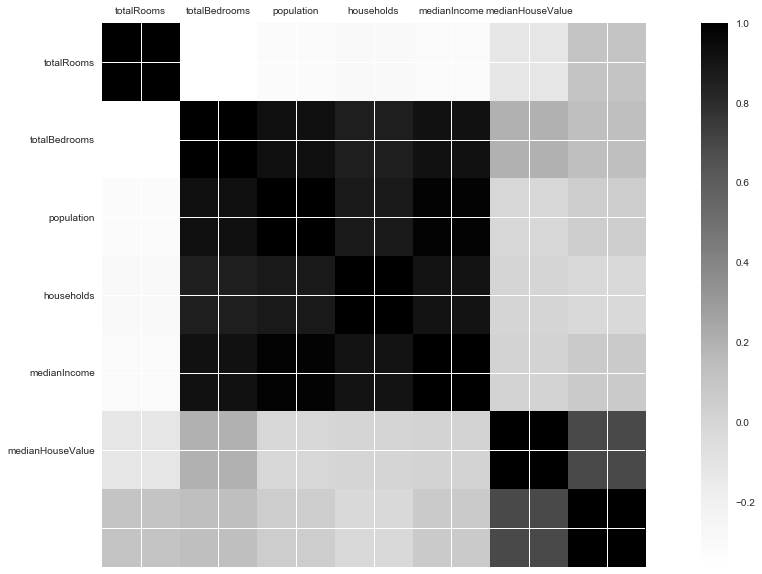

In [85]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dfOrig.corr(), interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(dfOrig)
ax.set_yticklabels(dfOrig)


C:\Users\OmSai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


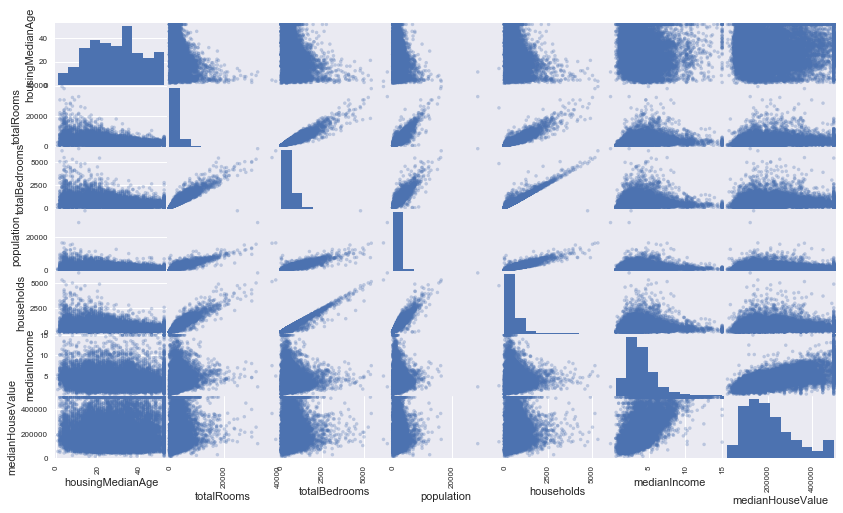

In [80]:
pd.scatter_matrix(dfOrig, alpha = 0.3, figsize = (14,8), diagonal = 'hist');

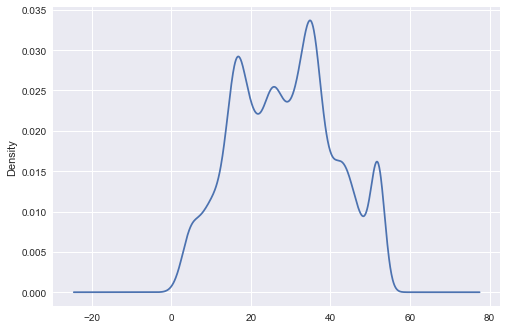

In [83]:
#dfOrig['housingMedianAge'].plot.hist()
dfOrig['housingMedianAge'].plot.kde()

In [78]:
import seaborn as sns

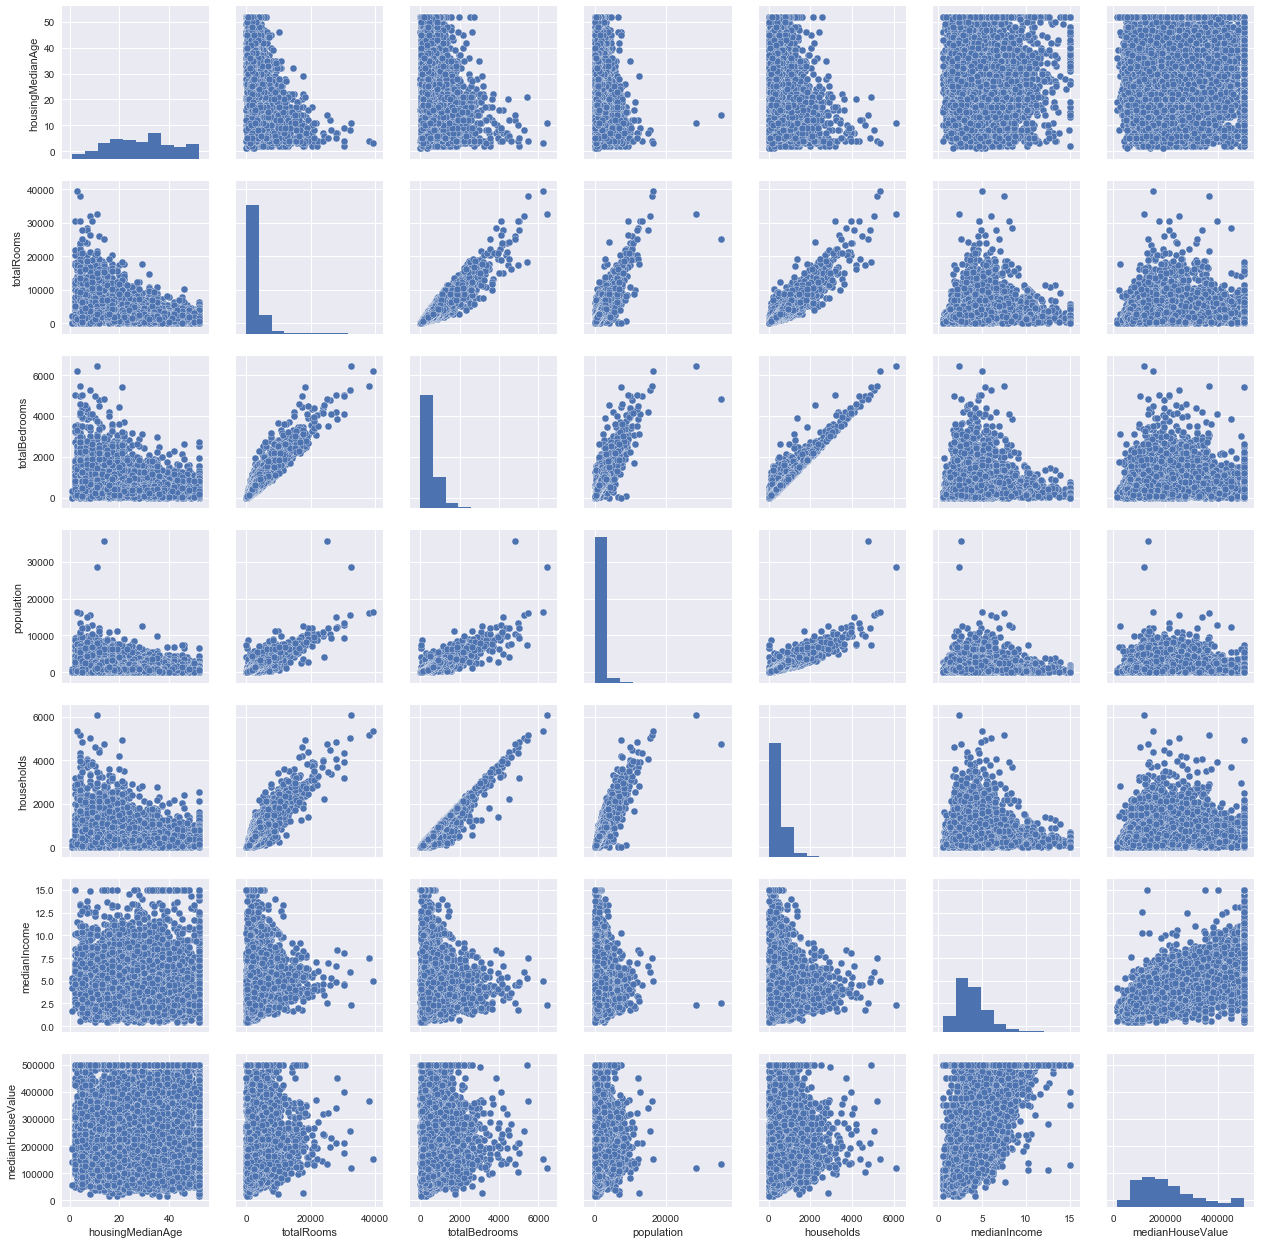

In [79]:
sns.pairplot(dfOrig)

In [ ]:
dfOrig.columns

In [ ]:
trainIndexes = ['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome']
YIndex = 'medianHouseValue'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfOrig[trainIndexes], 
                                                    dfOrig[YIndex], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)


In [ ]:
X_train = pd.DataFrame(data= scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [ ]:
X_train.head()

In [ ]:
import tensorflow as tf

In [ ]:
#features
housingMedianAge_ = tf.feature_column.numeric_column('housingMedianAge')
totalRooms_ = tf.feature_column.numeric_column('totalRooms')
totalBedrooms_ = tf.feature_column.numeric_column('totalBedrooms')
population_ = tf.feature_column.numeric_column('population')
households_ = tf.feature_column.numeric_column('households')
medianIncome_ = tf.feature_column.numeric_column('medianIncome')


In [ ]:
feat_cols = [housingMedianAge_ ,totalRooms_,totalBedrooms_ ,population_ ,households_,medianIncome_]

In [ ]:
#estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [ ]:
model = tf.estimator.DNNRegressor(hidden_units=[6,10,10,10],feature_columns=feat_cols)

In [ ]:
dfOrig.describe().transpose()

In [ ]:
model.train(input_fn=input_func,steps=20000)

In [ ]:
##How Well

predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [ ]:
pred_gen = model.predict(predict_input_func)

In [ ]:
predictions = list(pred_gen)

In [ ]:
predictions

In [ ]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [ ]:
y_test.head()

In [ ]:
final_preds


In [ ]:
from sklearn.metrics import mean_squared_error

In [76]:
mean_squared_error(y_test,final_preds)**0.5

80618.008847476915

In [ ]:
## check with Linear Regression


In [ ]:
Linmodel = tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [ ]:
Linmodel.train(input_fn=input_func,steps=100000)

In [75]:
pred_gen = Linmodel.predict(predict_input_func)
predictions = list(pred_gen)
mean_squared_error(y_test,final_preds)**0.5

INFO:tensorflow:Restoring parameters from C:\Users\OmSai\AppData\Local\Temp\tmp478pcr6f\model.ckpt-120000


80618.008847476915